In [1]:
#Importing the Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#loading the test_set
data_test = pd.read_csv(r'C:\Users\Sir\python lessons\Zindi Hackathon\Financial Inclusion Dataset\Test set\Test.csv')
data_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [3]:
#loading the training data
df = pd.read_csv(r'C:\Users\Sir\python lessons\Zindi Hackathon\Financial Inclusion Dataset\Training set\Train.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
#This is to have a glimpse of number of columns with categorical variables
for i in df.columns:
    if df[i].value_counts().count() < 20:
        print(f'Column name:\n {i},unique_count:{df[i].value_counts().count()}')

Column name:
 country,unique_count:4
Column name:
 year,unique_count:3
Column name:
 bank_account,unique_count:2
Column name:
 location_type,unique_count:2
Column name:
 cellphone_access,unique_count:2
Column name:
 gender_of_respondent,unique_count:2
Column name:
 relationship_with_head,unique_count:6
Column name:
 marital_status,unique_count:5
Column name:
 education_level,unique_count:6
Column name:
 job_type,unique_count:10


**Seems Like Majority of Our Columns are Categorical Variables or can be categorized**

In [6]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

<Axes: >

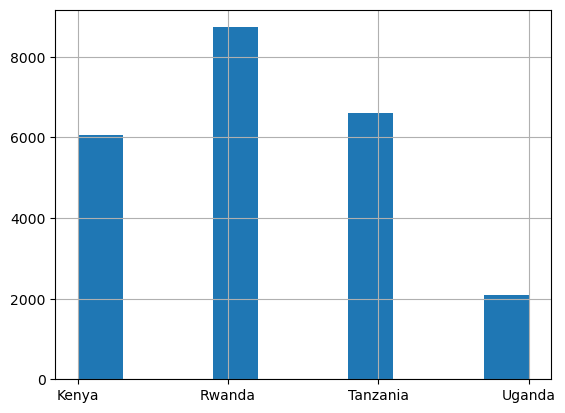

In [7]:
#Since this dataset is drawn from different Countries, lets see the distribution of each country in the dataset
df['country'].hist()

As you can see Uganda has the lowest representation in the dataset.

And also we noticed that the data is sorted by country while viewing some part of the data.i.e **df.head(),df.tail()**

During the train test split we will have to use shuffle_split to make sure every country is represented proportionally,
in both training and testing sets

In [8]:
#Our target column is the bank_account which we'll have to convert to numerical categorical variable
Target_dummy = pd.get_dummies(df['bank_account'])

#we the remove the bank_account column as we have no use for it now
df.drop('bank_account',axis =1, inplace = True)

#we add our encoded columns to our training set.Mind you now we have two columns Yes and No column
df = df.join(Target_dummy)
df.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,No,Yes
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,0,1
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,1,0


In [9]:
#As one column can do the job,
#We remove The 'No' column
df.drop('No',axis = 1,inplace = True)

#Remaining with Yes we rename the column to Bank_account_Yes for proper visualization
df['Bank_account_Yes'] = df['Yes']
df.drop('Yes',axis = 1,inplace = True)
df.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Bank_account_Yes
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,0
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,0


In [10]:
#Now we preprocess our data to make it ready for our machine learning model.
#As we have different datasets for the training and test sets, we would like to make sure our pre_processing steps
# are similar
#That's why we use neHotEncoder with ColumnTransformer to ensure we fit_transform the training set and Transform the test set
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#We group the Categorical variables first
Categorical = ['country','location_type','cellphone_access','gender_of_respondent','relationship_with_head',
               'marital_status','education_level','job_type']
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
column_transformer = ColumnTransformer(
    transformers = [('cat',one_hot_encoder,Categorical)
                   ],
    remainder = 'passthrough'
)
# Fit the transformer on training data and transform both training and test data
train_encoded = column_transformer.fit_transform(df.drop('Bank_account_Yes',axis = 1))
test_encoded = column_transformer.transform(data_test)

# Convert encoded data back to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=column_transformer.get_feature_names_out())
test_encoded_df = pd.DataFrame(test_encoded, columns=column_transformer.get_feature_names_out())

train_encoded_df['Bank_account_Yes'] = df["Bank_account_Yes"]

print("Encoded Training DataFrame:")
print(train_encoded_df)


Encoded Training DataFrame:
      cat__country_Kenya cat__country_Rwanda cat__country_Tanzania  \
0                    1.0                 0.0                   0.0   
1                    1.0                 0.0                   0.0   
2                    1.0                 0.0                   0.0   
3                    1.0                 0.0                   0.0   
4                    1.0                 0.0                   0.0   
...                  ...                 ...                   ...   
23519                0.0                 0.0                   0.0   
23520                0.0                 0.0                   0.0   
23521                0.0                 0.0                   0.0   
23522                0.0                 0.0                   0.0   
23523                0.0                 0.0                   0.0   

      cat__country_Uganda cat__location_type_Rural cat__location_type_Urban  \
0                     0.0                      1.0  

C:\Users\Sir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
print("\nEncoded Test DataFrame:")
print(test_encoded_df)


Encoded Test DataFrame:
      cat__country_Kenya cat__country_Rwanda cat__country_Tanzania  \
0                    1.0                 0.0                   0.0   
1                    1.0                 0.0                   0.0   
2                    1.0                 0.0                   0.0   
3                    1.0                 0.0                   0.0   
4                    1.0                 0.0                   0.0   
...                  ...                 ...                   ...   
10081                0.0                 0.0                   0.0   
10082                0.0                 0.0                   0.0   
10083                0.0                 0.0                   0.0   
10084                0.0                 0.0                   0.0   
10085                0.0                 0.0                   0.0   

      cat__country_Uganda cat__location_type_Rural cat__location_type_Urban  \
0                     0.0                      0.0     

**Remember :**

As only our Training set had the target variable, we converted it first apart from the other categorical columns
in our dataset

In [12]:
train_encoded_df.head()

,cat__country_Kenya,cat__country_Rwanda,cat__country_Tanzania,cat__country_Uganda,cat__location_type_Rural,cat__location_type_Urban,cat__cellphone_access_No,cat__cellphone_access_Yes,cat__gender_of_respondent_Female,cat__gender_of_respondent_Male,...,cat__job_type_Informally employed,cat__job_type_No Income,cat__job_type_Other Income,cat__job_type_Remittance Dependent,cat__job_type_Self employed,remainder__year,remainder__uniqueid,remainder__household_size,remainder__age_of_respondent,Bank_account_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2018,uniqueid_1,3,24,1
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_2,5,70,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2018,uniqueid_3,5,26,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_4,5,34,0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2018,uniqueid_5,8,26,0


In [13]:
test_encoded_df.head()

,cat__country_Kenya,cat__country_Rwanda,cat__country_Tanzania,cat__country_Uganda,cat__location_type_Rural,cat__location_type_Urban,cat__cellphone_access_No,cat__cellphone_access_Yes,cat__gender_of_respondent_Female,cat__gender_of_respondent_Male,...,cat__job_type_Government Dependent,cat__job_type_Informally employed,cat__job_type_No Income,cat__job_type_Other Income,cat__job_type_Remittance Dependent,cat__job_type_Self employed,remainder__year,remainder__uniqueid,remainder__household_size,remainder__age_of_respondent
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_6056,3,30
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_6060,7,51
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6065,3,77
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6072,6,39
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6073,3,16


In [14]:
df = train_encoded_df
data_test = test_encoded_df
df.head()

,cat__country_Kenya,cat__country_Rwanda,cat__country_Tanzania,cat__country_Uganda,cat__location_type_Rural,cat__location_type_Urban,cat__cellphone_access_No,cat__cellphone_access_Yes,cat__gender_of_respondent_Female,cat__gender_of_respondent_Male,...,cat__job_type_Informally employed,cat__job_type_No Income,cat__job_type_Other Income,cat__job_type_Remittance Dependent,cat__job_type_Self employed,remainder__year,remainder__uniqueid,remainder__household_size,remainder__age_of_respondent,Bank_account_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2018,uniqueid_1,3,24,1
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_2,5,70,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2018,uniqueid_3,5,26,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_4,5,34,0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2018,uniqueid_5,8,26,0


In [15]:
data_test.head()

,cat__country_Kenya,cat__country_Rwanda,cat__country_Tanzania,cat__country_Uganda,cat__location_type_Rural,cat__location_type_Urban,cat__cellphone_access_No,cat__cellphone_access_Yes,cat__gender_of_respondent_Female,cat__gender_of_respondent_Male,...,cat__job_type_Government Dependent,cat__job_type_Informally employed,cat__job_type_No Income,cat__job_type_Other Income,cat__job_type_Remittance Dependent,cat__job_type_Self employed,remainder__year,remainder__uniqueid,remainder__household_size,remainder__age_of_respondent
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_6056,3,30
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_6060,7,51
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6065,3,77
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6072,6,39
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6073,3,16


In [16]:
df.columns

Index(['cat__country_Kenya', 'cat__country_Rwanda', 'cat__country_Tanzania',
       'cat__country_Uganda', 'cat__location_type_Rural',
       'cat__location_type_Urban', 'cat__cellphone_access_No',
       'cat__cellphone_access_Yes', 'cat__gender_of_respondent_Female',
       'cat__gender_of_respondent_Male', 'cat__relationship_with_head_Child',
       'cat__relationship_with_head_Head of Household',
       'cat__relationship_with_head_Other non-relatives',
       'cat__relationship_with_head_Other relative',
       'cat__relationship_with_head_Parent',
       'cat__relationship_with_head_Spouse',
       'cat__marital_status_Divorced/Seperated',
       'cat__marital_status_Dont know',
       'cat__marital_status_Married/Living together',
       'cat__marital_status_Single/Never Married',
       'cat__marital_status_Widowed',
       'cat__education_level_No formal education',
       'cat__education_level_Other/Dont know/RTA',
       'cat__education_level_Primary education',
       'cat_

In [17]:
#We now separate our features from the target column
Features = df.loc[:,:'remainder__age_of_respondent']
Target =df['Bank_account_Yes']
Features.drop('remainder__uniqueid',axis =1,inplace =True)
Features.info()

C:\Users\Sir\AppData\Local\Temp\ipykernel_13944\4266986154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features.drop('remainder__uniqueid',axis =1,inplace =True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   cat__country_Kenya                                    23524 non-null  object
 1   cat__country_Rwanda                                   23524 non-null  object
 2   cat__country_Tanzania                                 23524 non-null  object
 3   cat__country_Uganda                                   23524 non-null  object
 4   cat__location_type_Rural                              23524 non-null  object
 5   cat__location_type_Urban                              23524 non-null  object
 6   cat__cellphone_access_No                              23524 non-null  object
 7   cat__cellphone_access_Yes                             23524 non-null  object
 8   cat__gender_of_respondent_Female                      23524 non-nu

In [18]:
Target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 23524 entries, 0 to 23523
Series name: Bank_account_Yes
Non-Null Count  Dtype
--------------  -----
23524 non-null  uint8
dtypes: uint8(1)
memory usage: 23.1 KB


<Axes: >

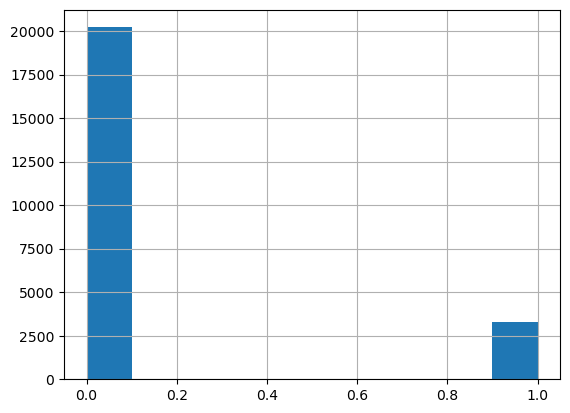

In [19]:
Target.hist()

**Note:**
Our Training Dataset is imbalanced,it had a lot of people with no bank accounts than those without.

We'll have to use Stratified Kfold in our validation and also good evaluation metrics to improve our model such as:
a confusion matrix,Precision,recall,f1-score 
This would provide clearer insight than only accuracy considering the imbalance of the dataset.

In [20]:
#I decided to use Logistic regression model In this case Due to its ability to handle classification tasks quite well
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score

#First I shuffled my Training dataset to remove the sortin by country and year that was there previously
X_train,X_test,y_train,y_test = train_test_split(Features,Target, test_size = 0.1,shuffle = True, random_state = 30)

In [21]:
#I initialize my Stratified KFold for the cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)


Mean MAE: 23.569641776611327
Mean Accuracy: 0.8855509149243851


# Note

The model performs fairly well when exposed to different parts of the data.
This can be attributed to the shuffling I did before that cleared the sorting which was in the dataset

**MAE is rarely used in classification tasks,I have used it due to the specifications of the Hackathon.**

In [25]:
#Now to select the right hyperparameters and parameters I utilize the GridSearch
from sklearn.model_selection import GridSearchCV


# Create the Logistic Regression model
Logistic_model = LogisticRegression()

# Define the parameter grid with conditional penalties based on the solver
param_grid = [
    {
        'C': [0.01, 0.1, 1, 10, 100,1000,10000],
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'max_iter': [100000],
        'class_weight': [None, 'balanced']
    },
    {
        'C': [0.01, 0.1, 1, 10, 100,1000,10000],
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100000],
        'class_weight': [None, 'balanced']
    }
]

# Create the Grid Search object with StratifiedKFold
grid_search = GridSearchCV(estimator=Logistic_model, param_grid=param_grid, cv=skf, scoring='f1')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'C': 0.01, 'class_weight': None, 'max_iter': 100000, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.781559153370259


# Note

The Grid found these to be the best parameters :
    'C': 1, 'class_weight': None, 'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear'
I decide to use **f1-score** as my scoring metric as my data was imbalanced and the positive class having less samples

Now I will Finally create my Logistic Regression Model with these parameters.

In [26]:
Model = LogisticRegression(C=1,class_weight = 'balanced',max_iter = 100000,penalty = 'l2',solver = 'liblinear')
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
y_train_pred = Model.predict(X_train)

mae = mean_absolute_error(y_test,y_pred)

print(f'Testing accuracy:\n{accuracy_score(y_test,y_pred)}')
print(f'Training acuracy:\n{accuracy_score(y_train,y_train_pred)}')
print(f'Testing MAE:\n{mean_absolute_error(y_test,y_pred)}')

Testing accuracy:
0.7968550786230344
Training acuracy:
0.7899957489017996
Testing MAE:
10.026349341266469


The model performs fairly well with an accuracy score of **80%**. 
I will use other evaluation metrics to get more insight on my model.

In [27]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

Confusion_m = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(Confusion_m)

Precision: 0.41
Recall: 0.75
[[1607  387]
 [  91  268]]


By using the confusion matrix we can see that our model is pretty well.


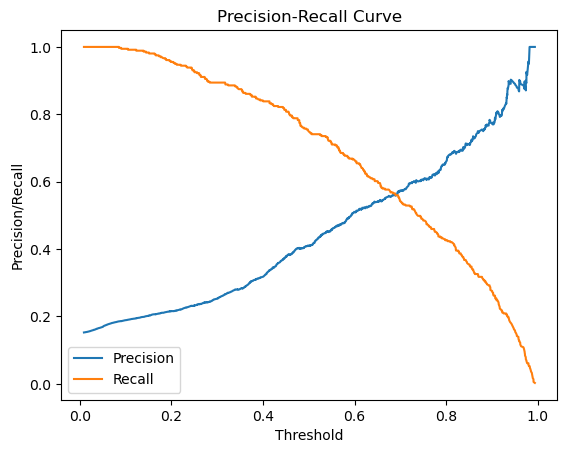

In [43]:
from sklearn.metrics import precision_recall_curve


# Predict probabilities
#y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()


In [51]:
#Now we predict our hackathon test set that we had initially converted.
#Note: the test set had no bank_account column.
bank_account = Model.predict(data_test.drop('remainder__uniqueid',axis =1))

# Convert the predictions to a Pandas Series
bank_account_series = pd.Series(bank_account, index=data_test.index, name='bank_account')


data_test = data_test.join(bank_account_series)

data_test.head()

,cat__country_Kenya,cat__country_Rwanda,cat__country_Tanzania,cat__country_Uganda,cat__location_type_Rural,cat__location_type_Urban,cat__cellphone_access_No,cat__cellphone_access_Yes,cat__gender_of_respondent_Female,cat__gender_of_respondent_Male,...,cat__job_type_Informally employed,cat__job_type_No Income,cat__job_type_Other Income,cat__job_type_Remittance Dependent,cat__job_type_Self employed,remainder__year,remainder__uniqueid,remainder__household_size,remainder__age_of_respondent,bank_account
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_6056,3,30,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2018,uniqueid_6060,7,51,1
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6065,3,77,0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6072,6,39,0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,2018,uniqueid_6073,3,16,0


In [52]:
# Step 1: Create a new column to hold the country name based on the one-hot encoded columns
conditions = [
    data_test['cat__country_Kenya'] == 1,
    data_test['cat__country_Rwanda'] == 1,
    data_test['cat__country_Tanzania'] == 1,
    data_test['cat__country_Uganda'] == 1
]
choices = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

data_test['country'] = np.select(conditions, choices)

# Step 2: Combine the 'uniqueid' with the identified country
data_test['unique_id'] = data_test['remainder__uniqueid'] + ' x ' + data_test['country']

# Now, you can view the new DataFrame
Submission_df = data_test[['unique_id','bank_account']]

Submission_df.head()


,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [53]:
Submission_df.to_excel("Logistic Regression Financial Inclusion Prediction.xlsx",sheet_name = "Predictions", index = False)

# Note

I decided to also use Random Forest Classifier in this same task.
On the notebook below,you can have a view on it too.